In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

# Linear Regression Example: Ads Spend

## Define the problem

Given: historical data of how much dollars a company spent on ads in different media (TV, radio, newspapers) and the respective sales.

Goal: predict what will be the sales given at particular add spendings.

(TV=20.50, radio=0, newspaper=75.0) => sales = ?

In [15]:
path_to_file = "https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/Advertising.csv"
df = pd.read_csv(path_to_file, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Get insight of the data (Prepare and clean)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [17]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


/media/nemsys/data/projects/courses/netIT/ML_SA/ML_SA_Labs/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


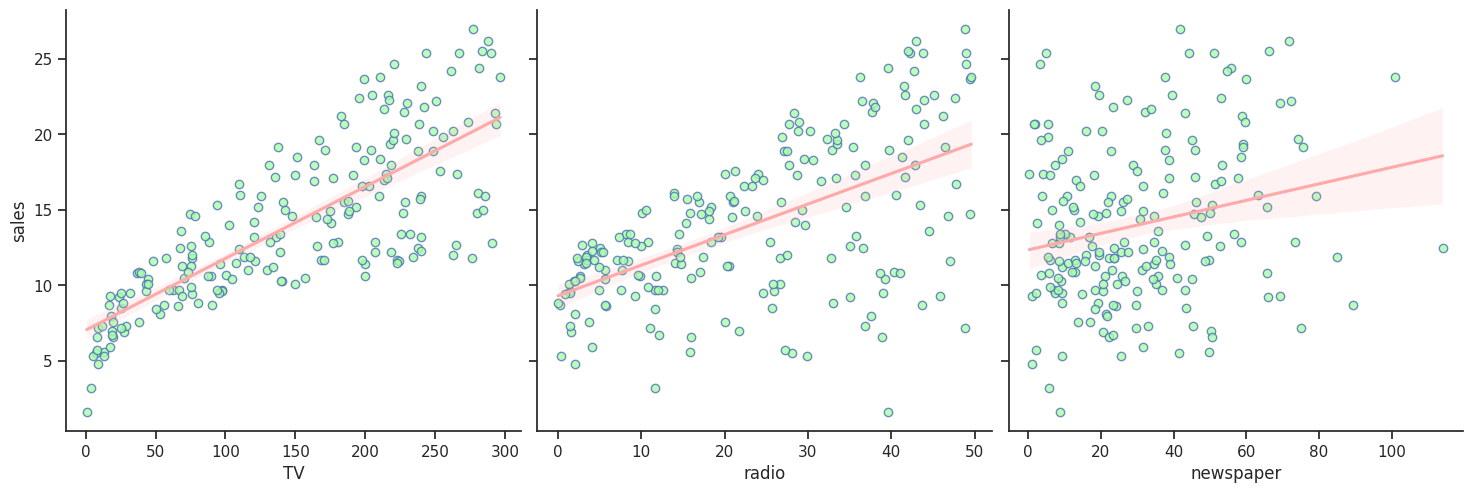

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,
             x_vars=['TV','radio','newspaper'],
             y_vars='sales',
             palette=sns.hls_palette(6, l=.6, s=.8),
             markers=["o"],
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')

In [19]:
X = df[['TV']]
y = df['sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (150, 1)
X_test shape: (50, 1)
y_train shape: (150,)
y_test shape: (50,)


In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)

# let's check the "learned" co-efficients:
print(lm.intercept_)
print(lm.coef_)

7.131784506685331
[0.04689446]


In [22]:
y_pred = lm.predict(X_test)

In [23]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared', r2_score(y_test, y_pred))

MAE:  2.273770594370873
MSE:  9.179298570399794
RMSE:  3.0297357261648736
R-squared 0.6606120390330492


In [24]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000
